In [16]:
#Carga de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib.ticker import FuncFormatter 

# MODELO 1

In [17]:
# Carga y visualziación de los datos
file_path = 'empresas.csv'  # Asegúrate de cambiar esto por tu ruta de archivo
data = pd.read_csv(file_path)
data

,NCOMP,ESTADO,AÑO,AC,CBV,DA,EBITDA,I,IN,CC,...,VN,AT,DT,EBIT,UB,PC,UR,IT,PT,GOT
0,C_1,activa,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,activa,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,activa,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,activa,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,activa,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,activa,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,activa,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,activa,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,activa,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [18]:
#Tipo de datos de cada columna
print(data.dtypes)

NCOMP      object
ESTADO     object
AÑO         int64
AC        float64
CBV       float64
DA        float64
EBITDA    float64
I         float64
IN        float64
CC        float64
VM        float64
VN        float64
AT        float64
DT        float64
EBIT      float64
UB        float64
PC        float64
UR        float64
IT        float64
PT        float64
GOT       float64
dtype: object


In [19]:
#Identificación de datos nulos
print(data.isnull().sum())

NCOMP     0
ESTADO    0
AÑO       0
AC        0
CBV       0
DA        0
EBITDA    0
I         0
IN        0
CC        0
VM        0
VN        0
AT        0
DT        0
EBIT      0
UB        0
PC        0
UR        0
IT        0
PT        0
GOT       0
dtype: int64


In [20]:
# Conversión de tipos de datos
data['NCOMP'] = data['NCOMP'].astype('string')
data['ESTADO'] = data['ESTADO'].astype('category')
data['AÑO'] = data['AÑO'].astype('int')
numeric_columns = ['AC', 'CBV', 'DA', 'EBITDA', 'I', 'IN', 'CC', 'VM', 'VN', 'AT', 'DT', 'EBIT', 'UB', 'PC', 'UR', 'IT', 'PT', 'GOT']
data[numeric_columns] = data[numeric_columns].astype('int')

In [6]:
#Tipo de datos de cada columna con la conversión de tipos
print(data.dtypes)

NCOMP       string
ESTADO    category
AÑO          int32
AC           int32
CBV          int32
DA           int32
EBITDA       int32
I            int32
IN           int32
CC           int32
VM           int32
VN           int32
AT           int32
DT           int32
EBIT         int32
UB           int32
PC           int32
UR           int32
IT           int32
PT           int32
GOT          int32
dtype: object


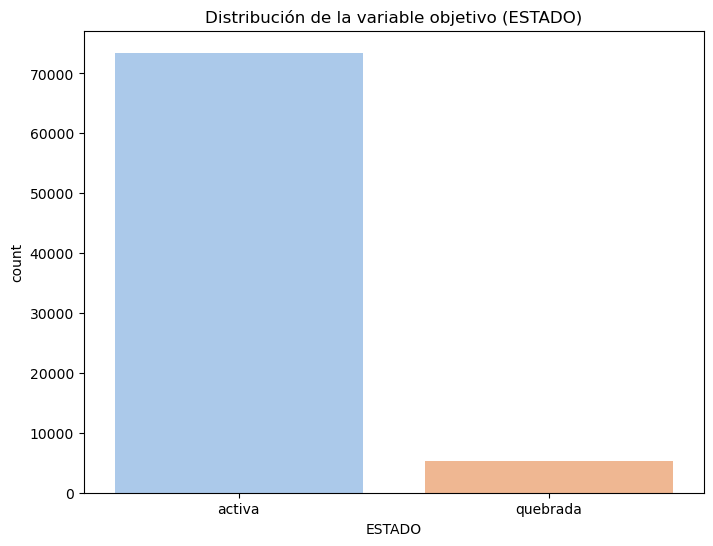

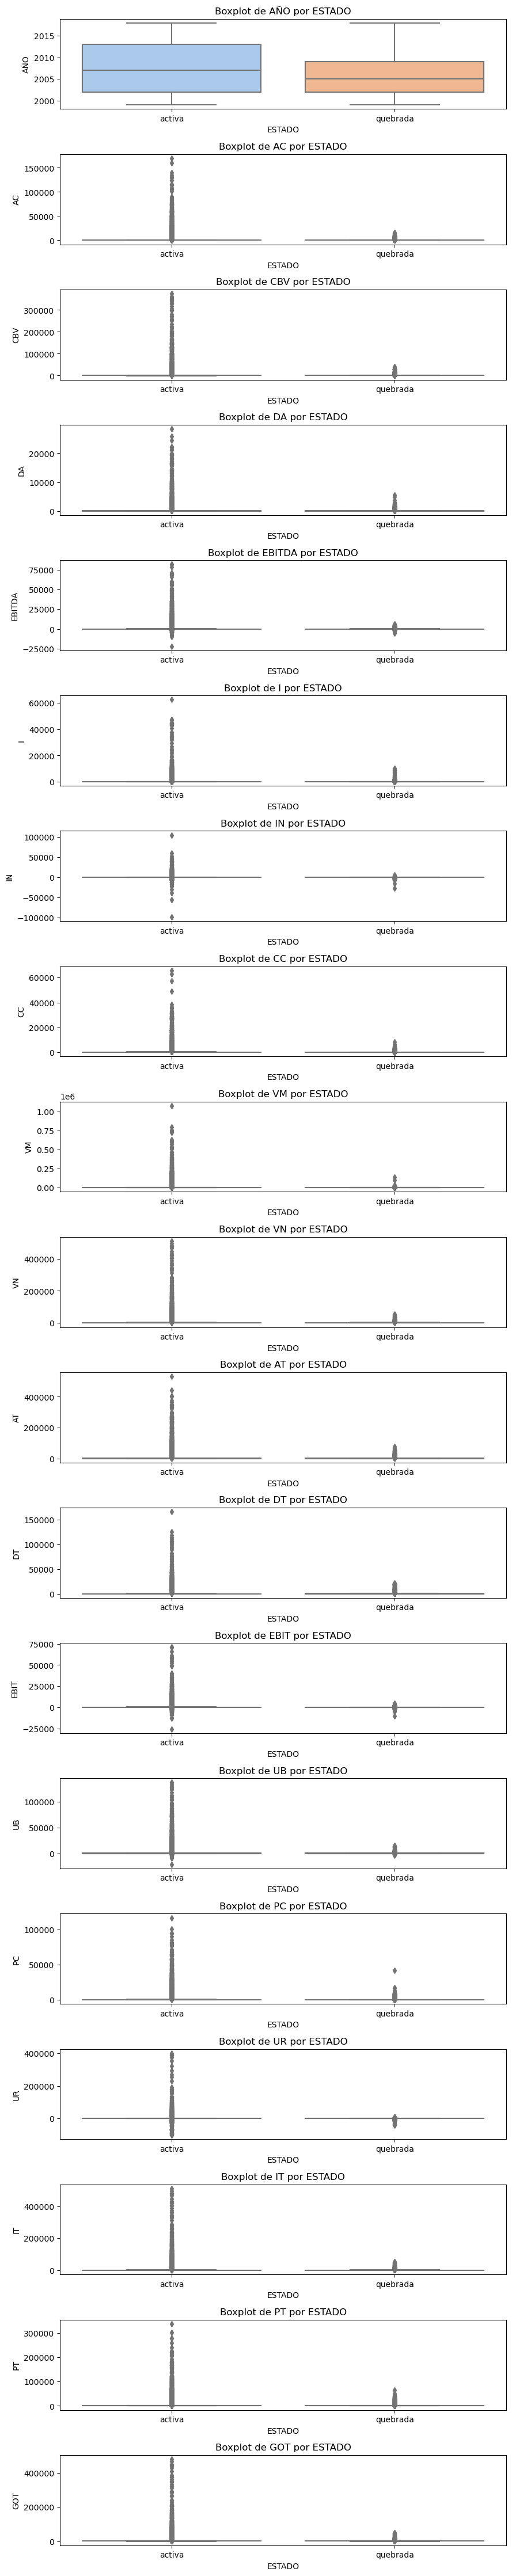

In [50]:
#Visualización de Variables en función de la varaible objetivo usando box-plot
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya has cargado tus datos en el DataFrame 'data'

# Visualización de la distribución de la variable objetivo "ESTADO"
plt.figure(figsize=(8, 6))
sns.countplot(x='ESTADO', data=data, palette='pastel')
plt.title('Distribución de la variable objetivo (ESTADO)')
plt.xlabel('ESTADO')
plt.show()

# Visualización de boxplots para variables numéricas en relación con "ESTADO"
numeric_columns = data.select_dtypes(include=['int32']).columns

# Crear subplots para boxplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 3 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Iterar sobre cada columna numérica y crear boxplot para cada categoría de "ESTADO"
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='ESTADO', y=col, data=data, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Boxplot de {col} por ESTADO')
    axes[i].set_xlabel('ESTADO')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.show()


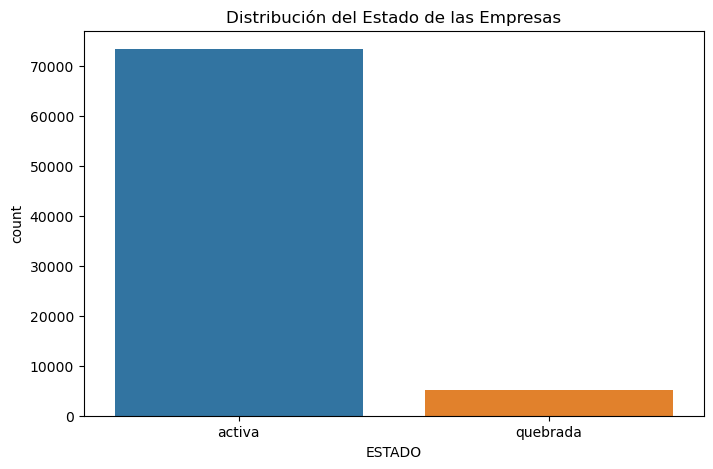

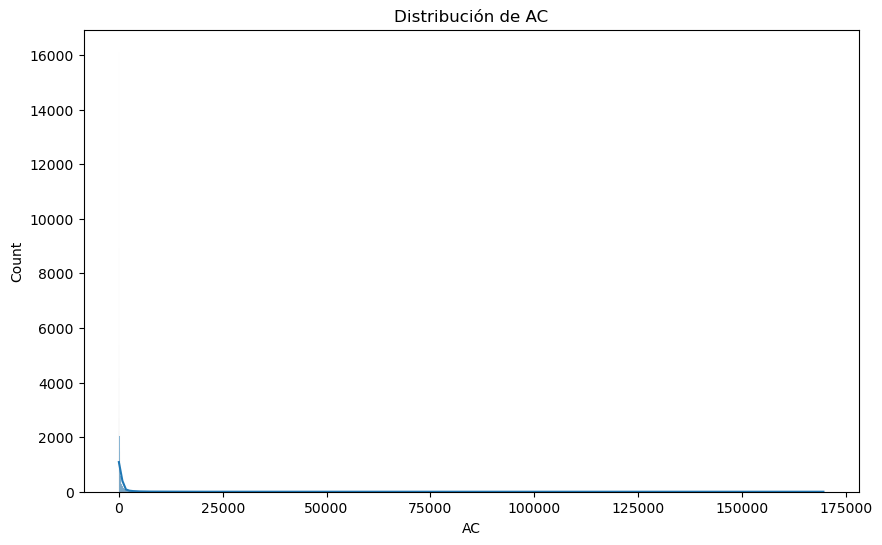

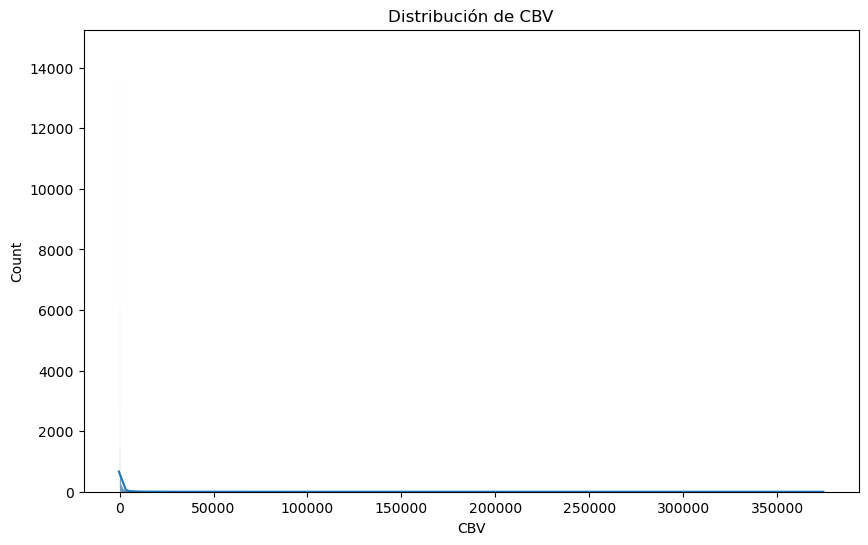

In [ ]:
# Análisis Exploratorio de Datos
plt.figure(figsize=(8, 5))
sns.countplot(x='ESTADO', data=data)
plt.title('Distribución del Estado de las Empresas')
plt.show()

for var in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribución de {var}')
    # Formatear el eje X para la variable 'Año'
    if var == 'AÑO':
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
    plt.show()

In [51]:
#análisis de varianza (ANOVA) para cada variable numérica en relación con la variable categórica "ESTADO"
from scipy.stats import f_oneway

# Supongamos que 'data' es tu DataFrame con las variables 'ESTADO' y todas las variables numéricas
# Asegúrate de importar las librerías necesarias y de tener tu DataFrame cargado con los datos

# Lista para almacenar los resultados de ANOVA
resultados_anova = []

# Iterar sobre todas las variables numéricas
for variable_numerica in data.select_dtypes(include='int32').columns:
    # Realizar ANOVA
    grupo_estado = [data[variable_numerica][data['ESTADO'] == estado] for estado in data['ESTADO'].unique()]
    resultado_anova = f_oneway(*grupo_estado)
    
    # Almacenar resultados en la lista
    resultados_anova.append({
        'Variable Numerica': variable_numerica,
        'Estadística F': resultado_anova.statistic,
        'Valor p': resultado_anova.pvalue
    })

# Crear DataFrame con los resultados
df_resultados_anova = pd.DataFrame(resultados_anova)

# Imprimir los resultados
print(df_resultados_anova)

# Ordenar el DataFrame por valor p de menor a mayor
df_resultados_anova = df_resultados_anova.sort_values(by='Valor p')

# Imprimir las 5 variables con más importancia
print("\nTop 5 variables con más importancia:\n")
df_resultados_anova.head(5)

   Variable Numerica  Estadística F        Valor p
0                AÑO     550.278884  2.862534e-121
1                 AC      83.907445   5.304912e-20
2                CBV      38.219255   6.353475e-10
3                 DA      16.435298   5.038744e-05
4             EBITDA      78.387001   8.641945e-19
5                  I      47.642766   5.152606e-12
6                 IN     109.939327   1.050614e-25
7                 CC      74.613997   5.828425e-18
8                 VM     107.914227   2.914342e-25
9                 VN      54.557517   1.524504e-13
10                AT      48.474351   3.372469e-12
11                DT       6.802683   9.103818e-03
12              EBIT     103.002030   3.464992e-24
13                UB      76.681765   2.047339e-18
14                PC      44.759361   2.242847e-11
15                UR      67.099927   2.619154e-16
16                IT      54.557517   1.524504e-13
17                PT      22.140760   2.538026e-06
18               GOT      45.70

,Variable Numerica,Estadística F,Valor p
0,AÑO,550.278884,2.862534e-121
6,IN,109.939327,1.050614e-25
8,VM,107.914227,2.914342e-25
12,EBIT,103.002030,3.464992e-24
1,AC,83.907445,5.304912e-20


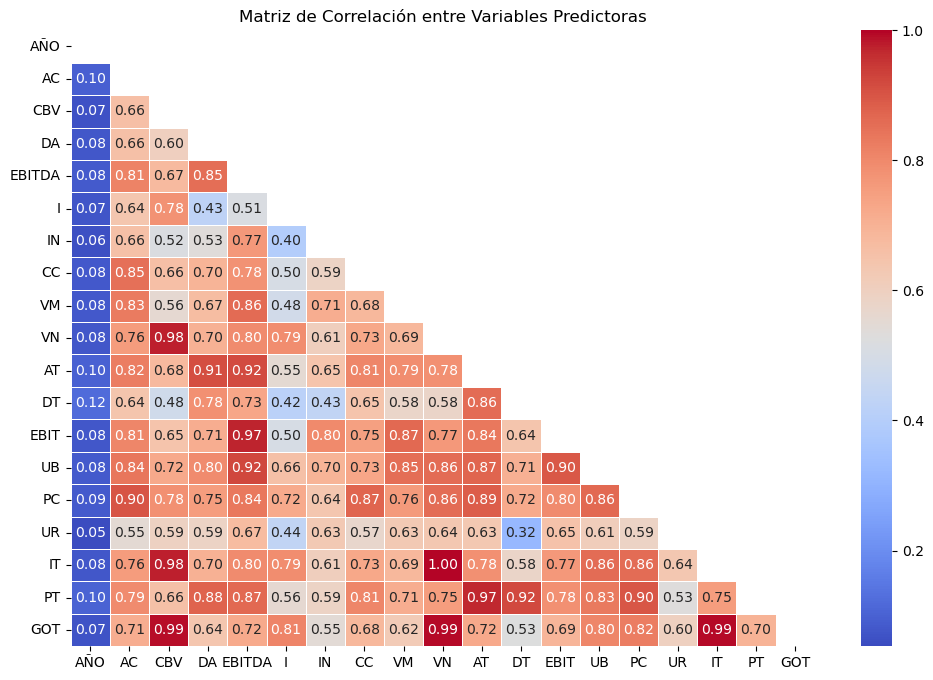

C:\Users\DIEVALL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


   Variable           VIF
0       AÑO -4.853531e-03
1        AC -2.859281e-03
2       CBV -8.950690e+04
3        DA  1.308365e+04
4    EBITDA -6.875488e+04
5         I  7.282793e-02
6        IN -3.711724e-02
7        CC  4.096557e-02
8        VM  2.270545e-04
9        VN           inf
10       AT -5.787548e-03
11       DT  1.028351e-02
12     EBIT  2.390461e+04
13       UB -3.064082e+04
14       PC -2.430246e-03
15       UR  1.320694e-03
16       IT           inf
17       PT -1.068015e-02
18      GOT  4.044281e+04


In [52]:
#Analisis de Correlación
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las variables predictoras numéricas
X = data[numeric_columns]

# Calcular la matriz de correlación
matriz_correlacion = X.corr()

# Crear una máscara para la mitad inferior de la matriz de correlación
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Visualizar la mitad inferior de la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mascara)
plt.title('Matriz de Correlación entre Variables Predictoras')
plt.show()

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)


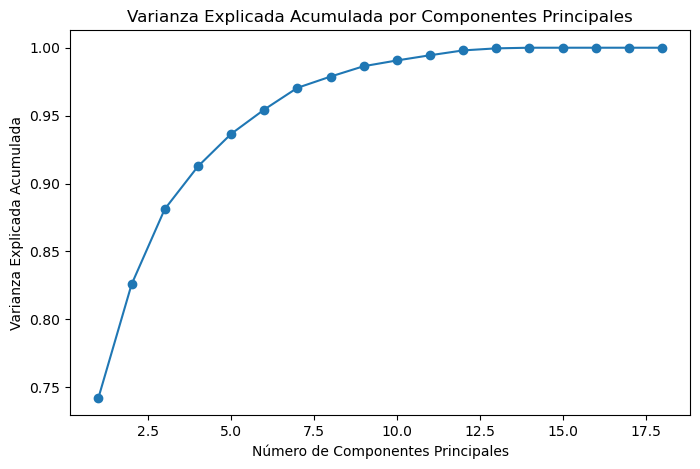

Número de componentes principales a retener: 8
         AC       CBV        DA    EBITDA         I        IN        CC  \
0  0.242945  0.229521  0.228897  0.257018  0.193641  0.200226  0.232131   
1 -0.064665  0.406545 -0.221504 -0.193437  0.428479 -0.139400 -0.093094   
2 -0.027282  0.046167  0.195446 -0.118289  0.124801 -0.485939  0.058081   
3 -0.466150  0.151828  0.440736  0.072195 -0.262123 -0.097395 -0.197427   
4  0.263424 -0.000556 -0.021579 -0.177550 -0.094042 -0.208271  0.634219   
5 -0.112567  0.256834 -0.080446  0.057375 -0.531274  0.386998  0.335527   
6 -0.077953 -0.072626 -0.118972 -0.147124  0.413607  0.624200 -0.094603   
7  0.114504 -0.114868  0.665410  0.006570  0.132756  0.229111  0.019138   

         VM        VN        AT        DT      EBIT        UB        PC  \
0  0.229885  0.252907  0.256697  0.205364  0.246081  0.257643  0.258225   
1 -0.182904  0.288748 -0.196858 -0.295643 -0.163714 -0.047711  0.018244   
2 -0.271934  0.022101  0.149603  0.469426 -0.244538 

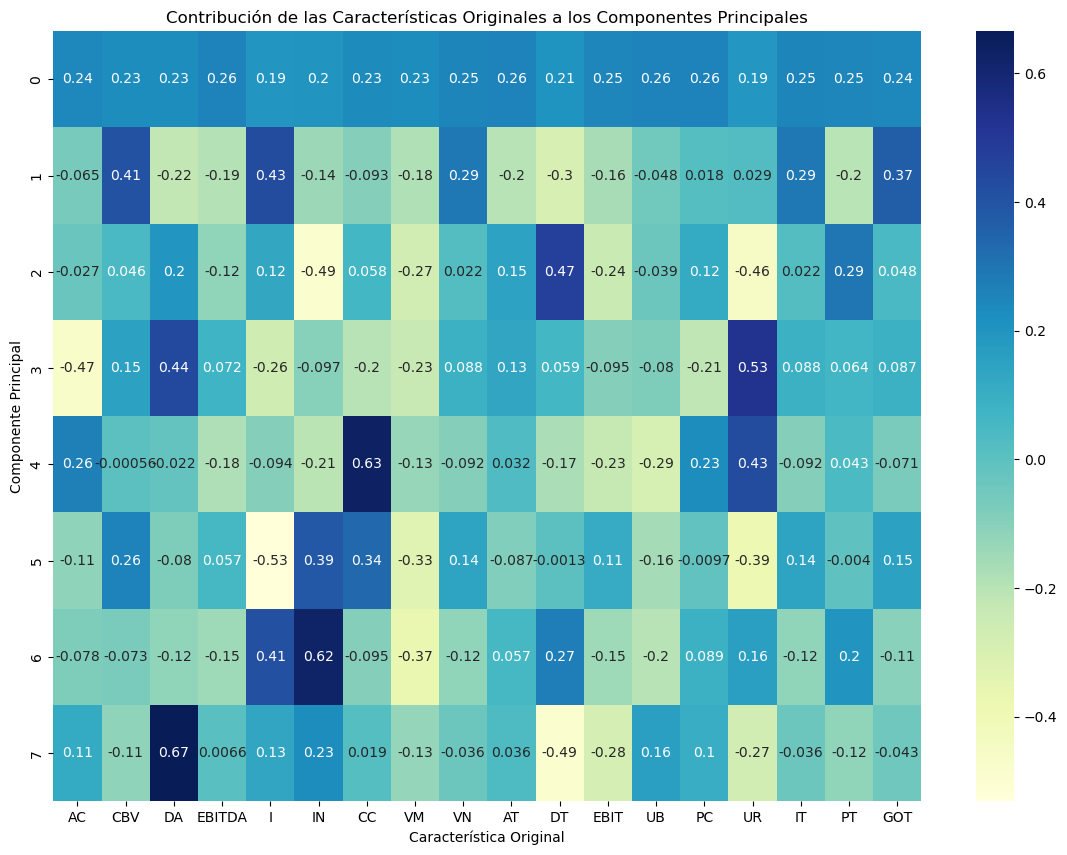


Componente Principal 1:
['PC', 'UB', 'EBITDA', 'AT', 'VN']

Componente Principal 2:
['I', 'CBV', 'GOT', 'DT', 'VN']

Componente Principal 3:
['IN', 'DT', 'UR', 'PT', 'VM']

Componente Principal 4:
['UR', 'AC', 'DA', 'I', 'VM']

Componente Principal 5:
['CC', 'UR', 'UB', 'AC', 'PC']

Componente Principal 6:
['I', 'IN', 'UR', 'CC', 'VM']

Componente Principal 7:
['IN', 'I', 'VM', 'DT', 'PT']

Componente Principal 8:
['DA', 'DT', 'EBIT', 'UR', 'IN']


In [62]:
#Reducción de la Dimensionalidad (8 COMPONENTES)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'data' es tu DataFrame y 'numeric_columns' es la lista de columnas numéricas
# Seleccionando solo las variables numéricas
data_numeric = data[numeric_columns]

# Estandarizando las variables numéricas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Aplicando PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Calculando la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Visualizando la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

# Decidiendo el número de componentes a retener
num_componentes = np.where(varianza_explicada_acumulada >= 0.975)[0][0] + 1
print(f"Número de componentes principales a retener: {num_componentes}")

# Aplicando PCA con el número seleccionado de componentes
pca_reducido = PCA(n_components=num_componentes)
data_pca = pca_reducido.fit_transform(data_scaled)

# Convertir los vectores propios en un DataFrame
componentes_df = pd.DataFrame(pca_reducido.components_, columns=numeric_columns)
print(componentes_df)

# Visualización de los componentes principales
plt.figure(figsize=(14, 10))
sns.heatmap(componentes_df, cmap='YlGnBu', annot=True)
plt.title('Contribución de las Características Originales a los Componentes Principales')
plt.ylabel('Componente Principal')
plt.xlabel('Característica Original')
plt.show()

# Identificar las variables más relevantes para cada componente principal
n_variables_importantes = 5  # Número de variables más importantes a mostrar por cada componente principal
for i in range(len(componentes_df)):
    print(f"\nComponente Principal {i + 1}:")
    component = componentes_df.iloc[i]
    variables_importantes = component.abs().sort_values(ascending=False).head(n_variables_importantes).index
    print(variables_importantes.tolist())

Epoch 1/5
1574/1574 [==============================] - 10s 5ms/step - loss: 0.2598 - accuracy: 0.9345 - val_loss: 0.2455 - val_accuracy: 0.9322
Epoch 2/5
1574/1574 [==============================] - 7s 5ms/step - loss: 0.2410 - accuracy: 0.9345 - val_loss: 0.2446 - val_accuracy: 0.9322
Epoch 3/5
1574/1574 [==============================] - 7s 5ms/step - loss: 0.2411 - accuracy: 0.9345 - val_loss: 0.2450 - val_accuracy: 0.9322
Epoch 4/5
1574/1574 [==============================] - 7s 5ms/step - loss: 0.2408 - accuracy: 0.9345 - val_loss: 0.2443 - val_accuracy: 0.9322
Epoch 5/5
492/492 [==============================] - 2s 3ms/step - loss: 0.2437 - accuracy: 0.9321
Precisión del modelo: 0.9321344494819641

Los pesos de la primera capa son:

[[ 0.46217957  0.19448008]
 [-0.14754236  0.13426913]
 [-1.5194343  -2.5573356 ]
 [-0.9022185  -2.1115317 ]
 [ 0.01005063  1.0006819 ]
 [ 0.09110674 -0.5078247 ]
 [-0.19485778 -1.0908344 ]
 [-0.92419904 -1.7490249 ]]


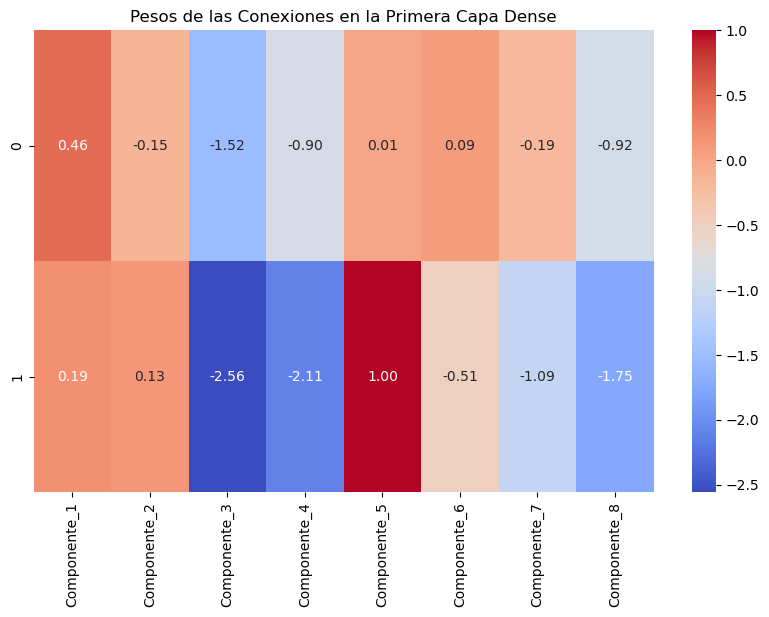


Importancia de los Componentes:

     Componente  Importancia
2  Componente_3     4.076770
3  Componente_4     3.013750
7  Componente_8     2.673224
6  Componente_7     1.285692
4  Componente_5     1.010733
0  Componente_1     0.656660
5  Componente_6     0.598931
1  Componente_2     0.281811
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 18        
                                                                 
 dropout_9 (Dropout)         (None, 2)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                 12        
                                                                 
 dropout_10 (Dropout)        (None, 4)                 0         
                                                                 
 dense_14 (Dense)      

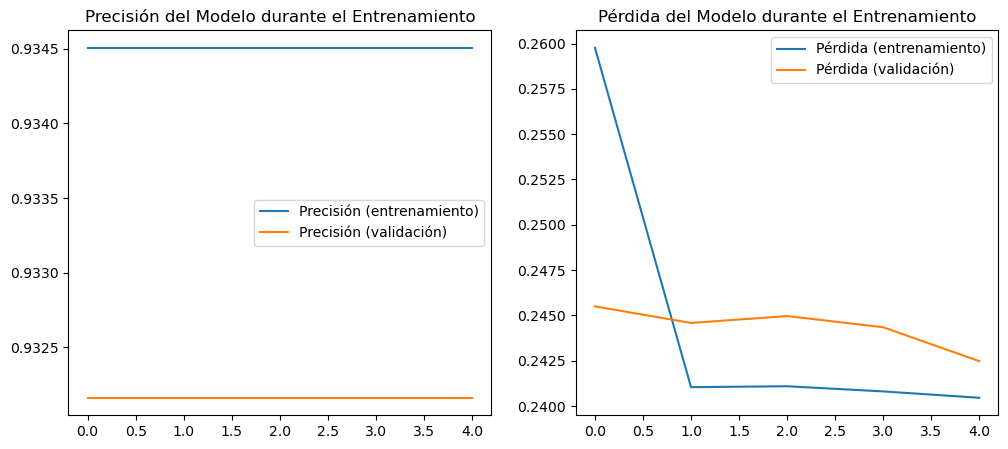

In [63]:
#Modelo 1. Sin eliminación de Outliers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Modelado con Redes Neuronales
X = data_pca[:, :num_componentes]  # Usar los componentes principales como características
y = data['ESTADO'].cat.codes  # Convertir 'ESTADO' en una variable binaria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo secuencial
model = Sequential()

# Agregar capa de entrada con el número de componentes principales encontrados (8)
model.add(Dense(2, input_dim=num_componentes, activation='relu'))
model.add(Dropout(0.5)) 

# Agregar capa oculta con 4 neuronas
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5)) 

# Agregar otra capa oculta con 2 neuronas
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5)) 

# Agregar capa de salida con 1 neurona y función de activación 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión del modelo: {accuracy}')

# Obtener los pesos de la primera capa Dense
pesos_capa_dense = model.layers[0].get_weights()[0]
print("\nLos pesos de la primera capa son:\n")
print(pesos_capa_dense)

# Calcular la importancia de cada componente
importancias = np.abs(pesos_capa_dense).sum(axis=1)

# Crear un DataFrame para visualizar las importancias junto con los nombres de las variables
df_importancias = pd.DataFrame({'Componente': [f'Componente_{i}' for i in range(1, num_componentes + 1)],
                                'Importancia': importancias})

# Ordenar el DataFrame por importancia de mayor a menor
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Visualizar los pesos
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(pesos_capa_dense.T, columns=[f'Componente_{i}' for i in range(1, num_componentes + 1)]), 
            cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pesos de las Conexiones en la Primera Capa Dense')
plt.show()

# Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.legend()

# Imprimir el DataFrame ordenado de importancias
print("\nImportancia de los Componentes:\n")
print(df_importancias)

# Obtener un resumen del modelo
model.summary()


In [64]:
# Imprimir tabla con precisión y pérdida
df_metricas = pd.DataFrame({
    'Epoch': range(1, len(history.history['accuracy']) + 1),
    'Precisión (entrenamiento)': history.history['accuracy'],
    'Precisión (validación)': history.history['val_accuracy'],
    'Pérdida (entrenamiento)': history.history['loss'],
    'Pérdida (validación)': history.history['val_loss']
})

print("\nTabla de Métricas:")
df_metricas


Tabla de Métricas:


,Epoch,Precisión (entrenamiento),Precisión (validación),Pérdida (entrenamiento),Pérdida (validación)
0,1,0.934506,0.932163,0.259764,0.245494
1,2,0.934506,0.932163,0.241036,0.244580
2,3,0.934506,0.932163,0.241087,0.244960
3,4,0.934506,0.932163,0.240802,0.244343
4,5,0.934506,0.932163,0.240451,0.242471


# MODELO 2

In [7]:
# Carga y visualziación de los datos
file_path = 'empresas.csv'  # Asegúrate de cambiar esto por tu ruta de archivo
data = pd.read_csv(file_path)
data

,NCOMP,ESTADO,AÑO,AC,CBV,DA,EBITDA,I,IN,CC,...,VN,AT,DT,EBIT,UB,PC,UR,IT,PT,GOT
0,C_1,activa,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,activa,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,activa,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,activa,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,activa,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,activa,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,activa,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,activa,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,activa,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [8]:
# Conversión de tipos de datos
data['NCOMP'] = data['NCOMP'].astype('string')
data['ESTADO'] = data['ESTADO'].astype('category')
data['AÑO'] = data['AÑO'].astype('int')
numeric_columns = ['AC', 'CBV', 'DA', 'EBITDA', 'I', 'IN', 'CC', 'VM', 'VN', 'AT', 'DT', 'EBIT', 'UB', 'PC', 'UR', 'IT', 'PT', 'GOT']
data[numeric_columns] = data[numeric_columns].astype('int')

In [9]:
# Limpieza de datos y eliminación de outliers mediante el método Intercuartílico
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= (Q1 - 1.5 * IQR)) & (data[col] <= (Q3 + 1.5 * IQR))]

In [10]:
data

,NCOMP,ESTADO,AÑO,AC,CBV,DA,EBITDA,I,IN,CC,...,VN,AT,DT,EBIT,UB,PC,UR,IT,PT,GOT
31,C_3,activa,1999,9,19,0,0,5,-2,3,...,29,13,5,0,9,2,-6,29,8,29
32,C_3,activa,2000,7,16,0,0,4,0,3,...,25,11,4,0,8,2,-7,25,7,24
33,C_3,activa,2001,6,15,0,0,3,-1,2,...,24,8,3,0,8,2,-8,24,5,23
34,C_3,activa,2002,5,12,0,0,2,0,2,...,20,7,2,0,7,2,-8,20,5,19
35,C_3,activa,2004,5,12,0,1,2,1,2,...,19,6,0,1,7,3,-8,19,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78585,C_8957,activa,2013,17,21,2,2,0,0,6,...,46,30,0,0,25,9,-81,46,10,43
78589,C_8958,activa,1999,3,1,0,0,0,0,0,...,2,3,3,0,1,5,-85,2,11,2
78590,C_8958,activa,2000,2,1,0,-1,0,0,1,...,2,3,3,-1,1,0,-86,2,4,4
78591,C_8958,activa,2001,3,2,0,-2,0,-3,1,...,3,4,3,-2,1,0,-90,3,4,6


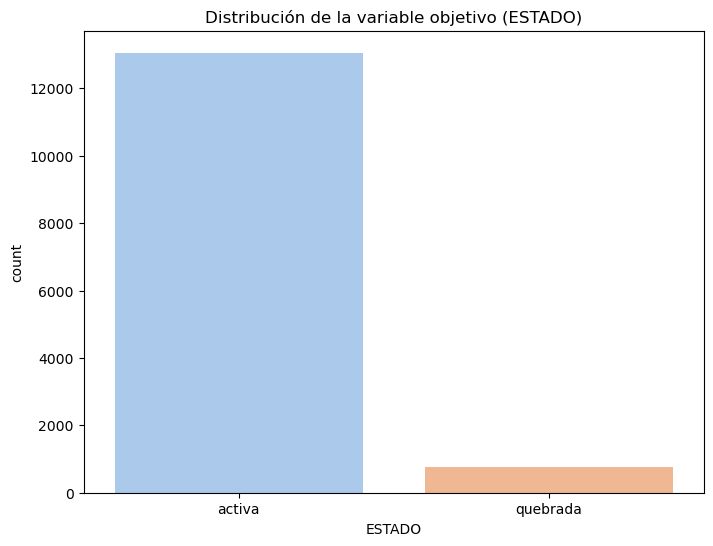

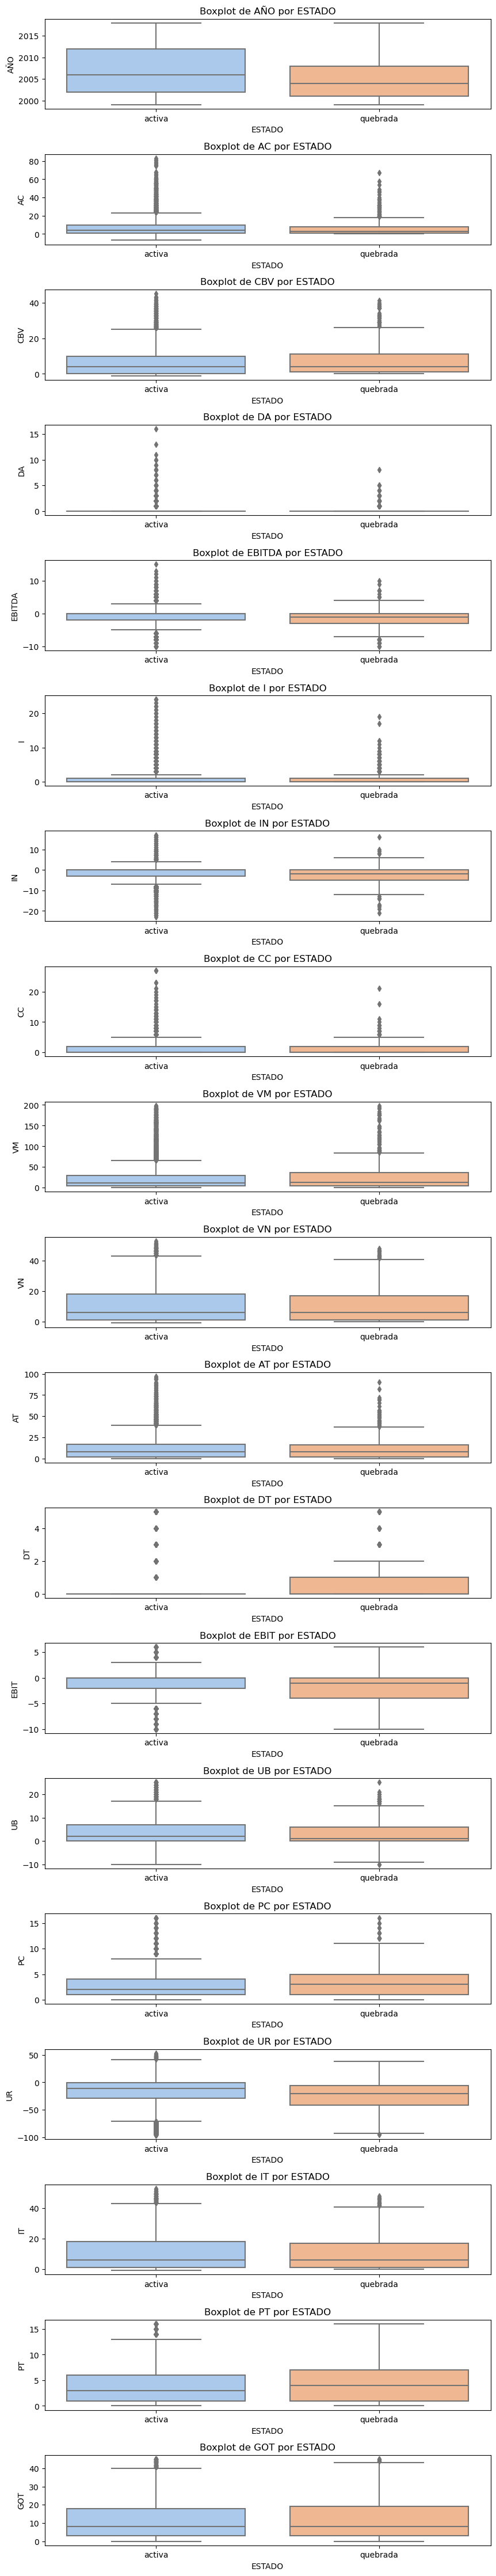

In [27]:
#Visualización de Variables en función de la varaible objetivo con tratamiento de outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya has cargado tus datos en el DataFrame 'data'

# Visualización de la distribución de la variable objetivo "ESTADO"
plt.figure(figsize=(8, 6))
sns.countplot(x='ESTADO', data=data, palette='pastel')
plt.title('Distribución de la variable objetivo (ESTADO)')
plt.xlabel('ESTADO')
plt.show()

# Visualización de boxplots para variables numéricas en relación con "ESTADO"
numeric_columns = data.select_dtypes(include=['int32']).columns

# Crear subplots para boxplots
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(10, 3 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Iterar sobre cada columna numérica y crear boxplot para cada categoría de "ESTADO"
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='ESTADO', y=col, data=data, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Boxplot de {col} por ESTADO')
    axes[i].set_xlabel('ESTADO')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.show()

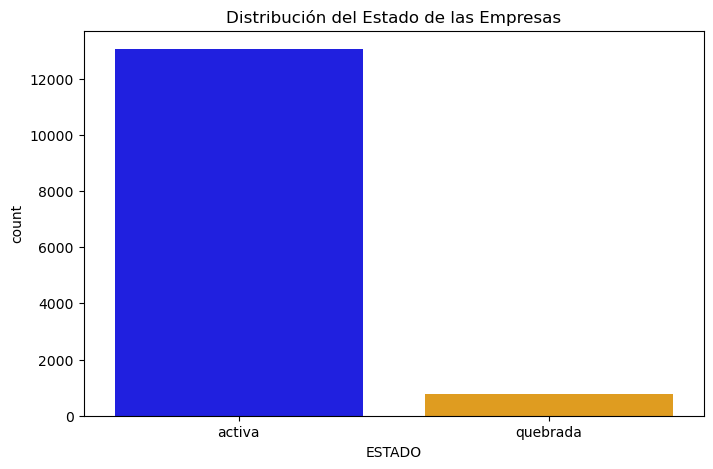

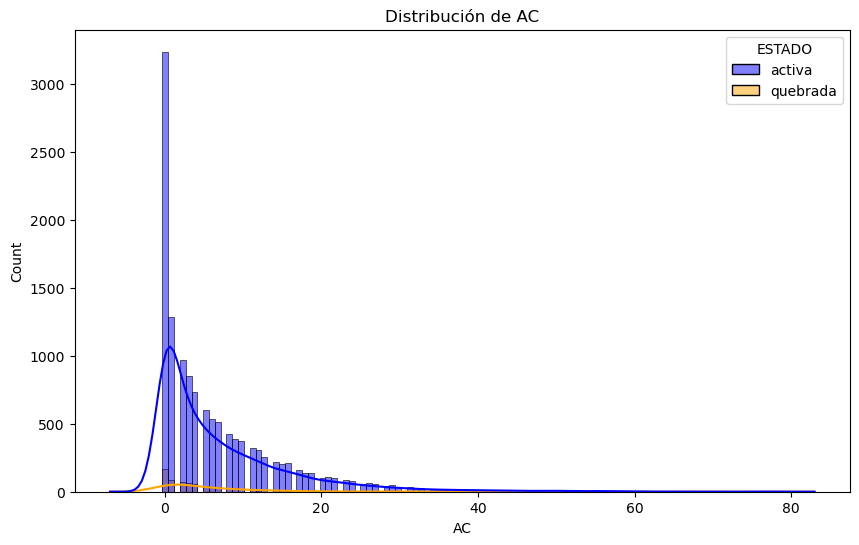

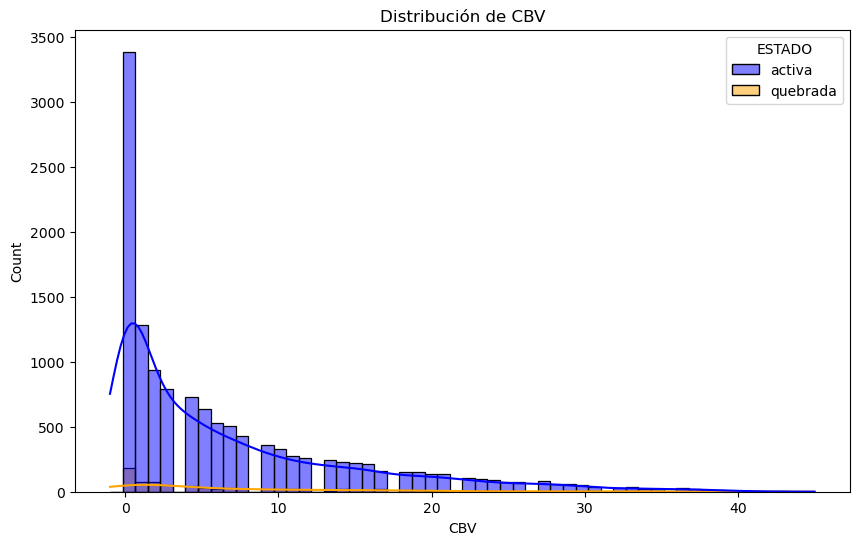

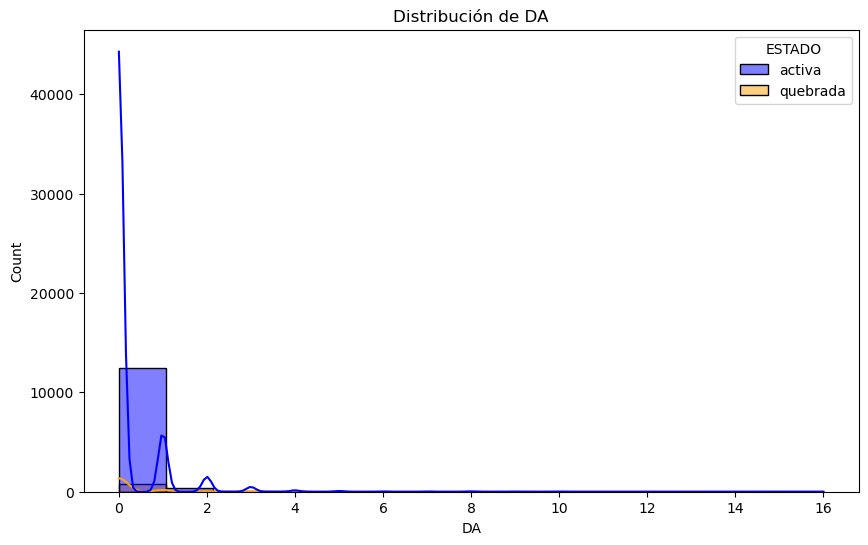

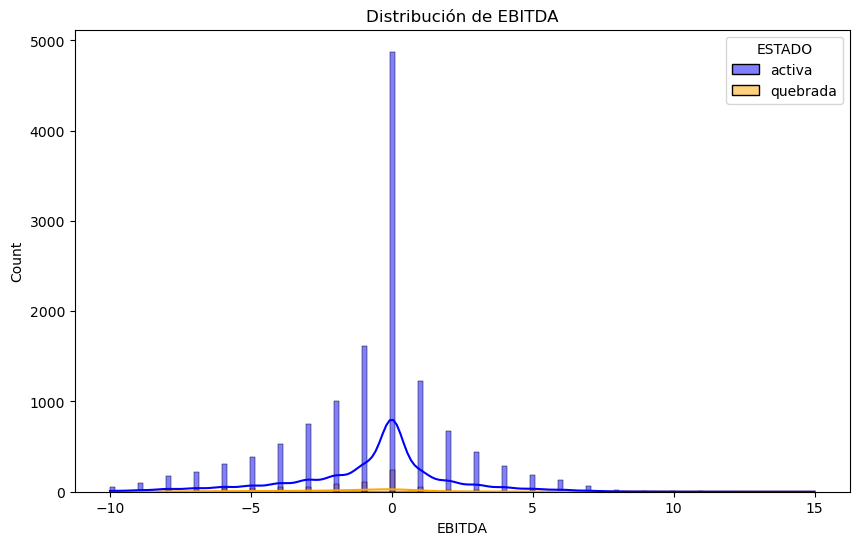

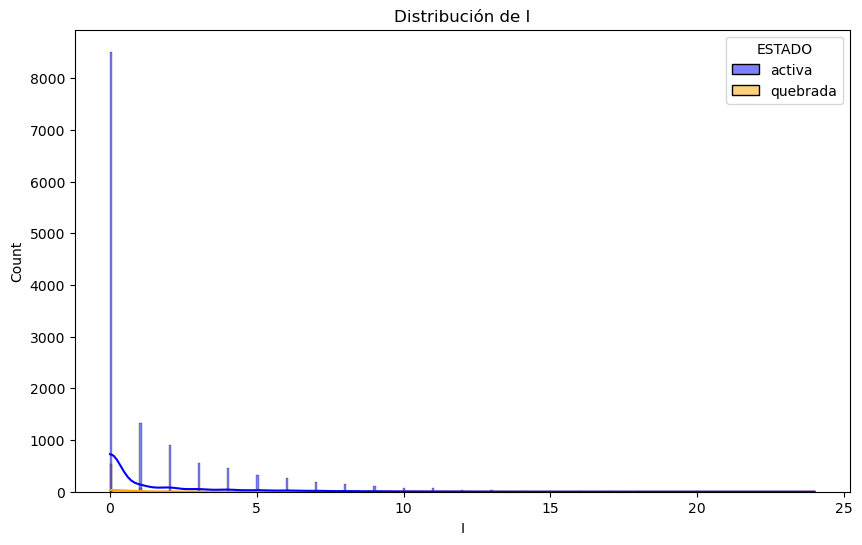

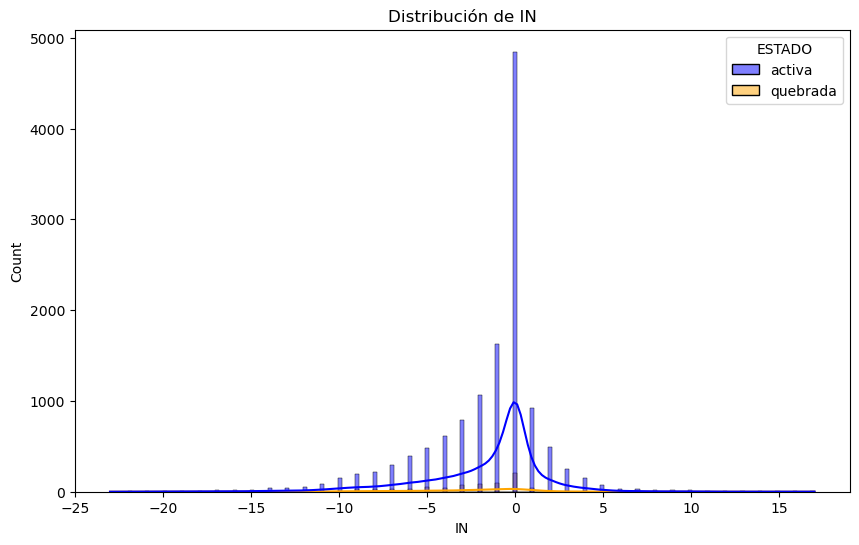

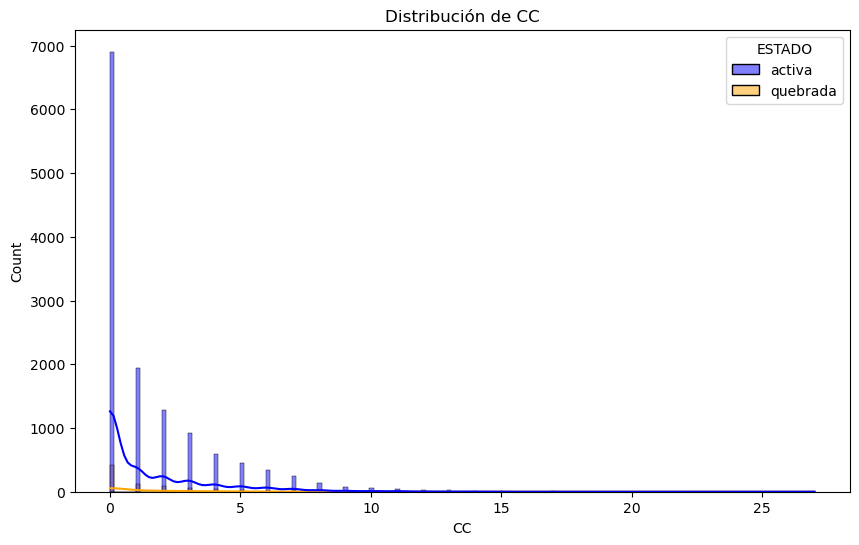

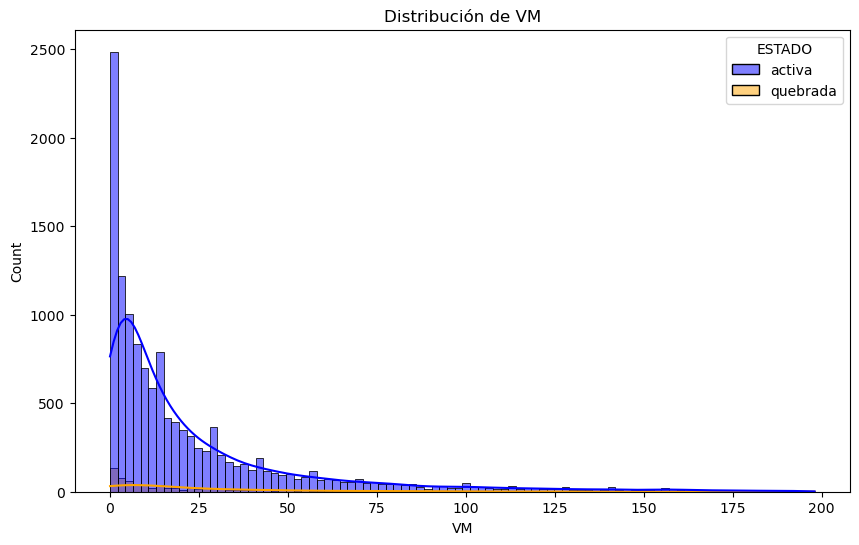

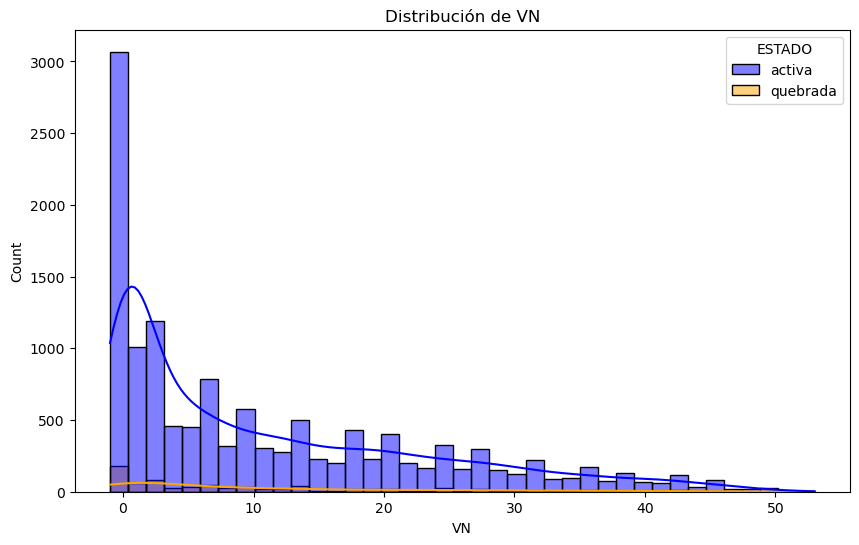

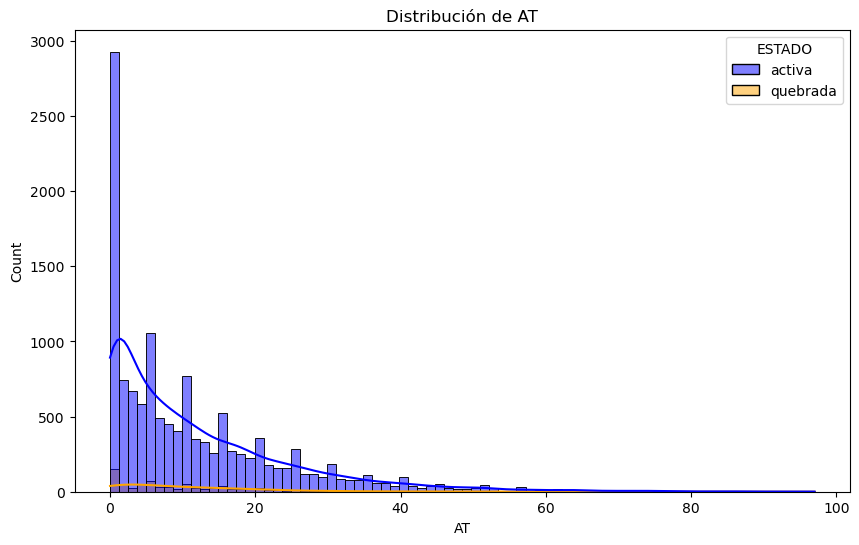

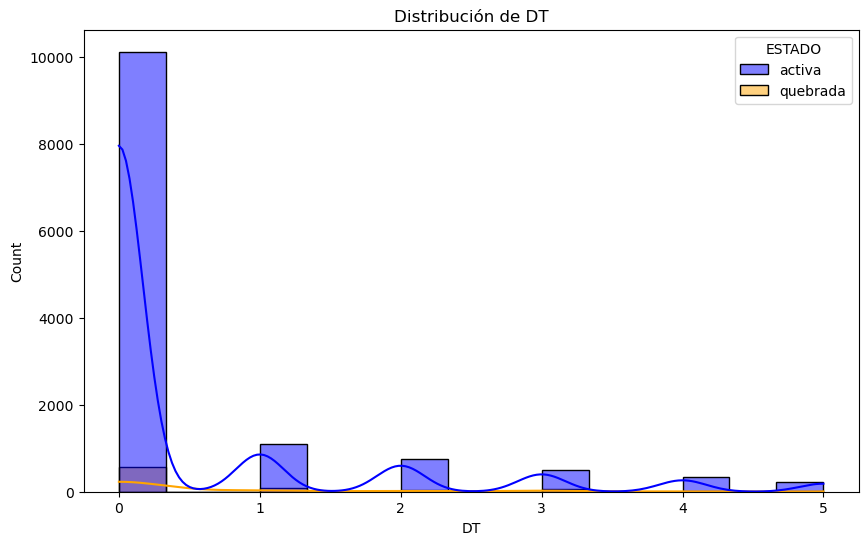

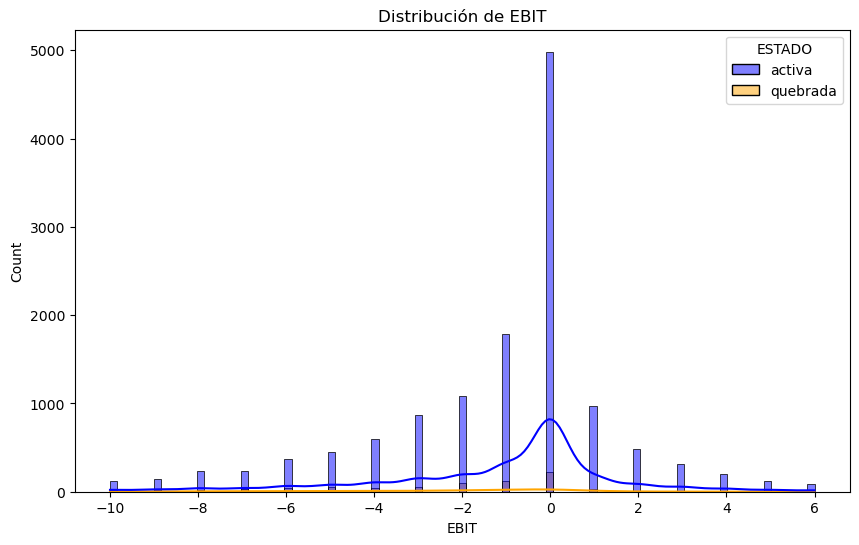

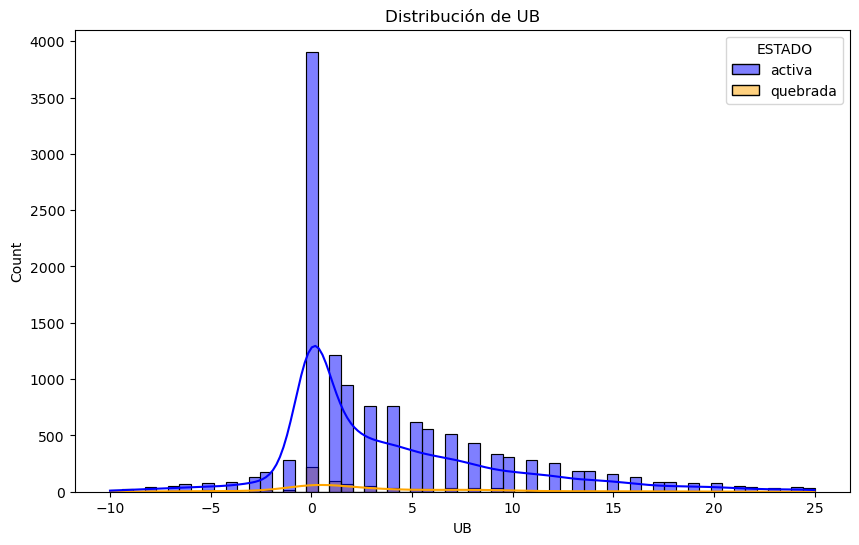

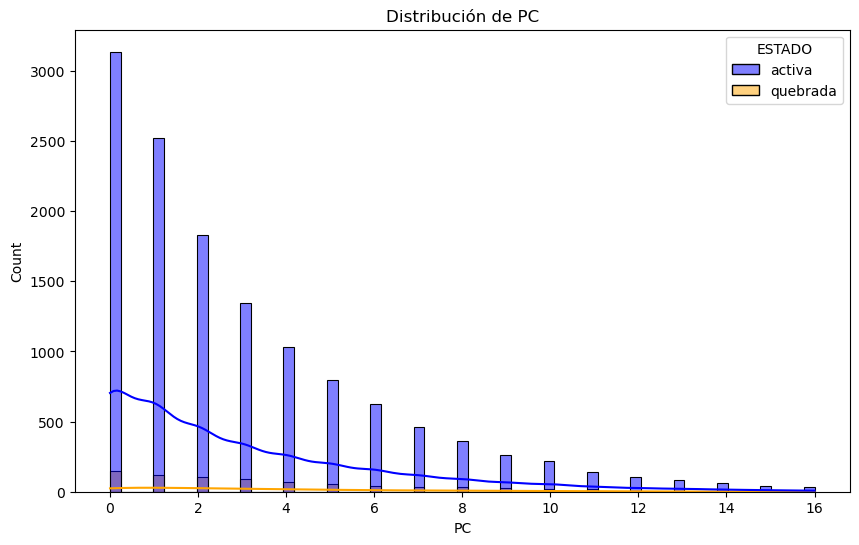

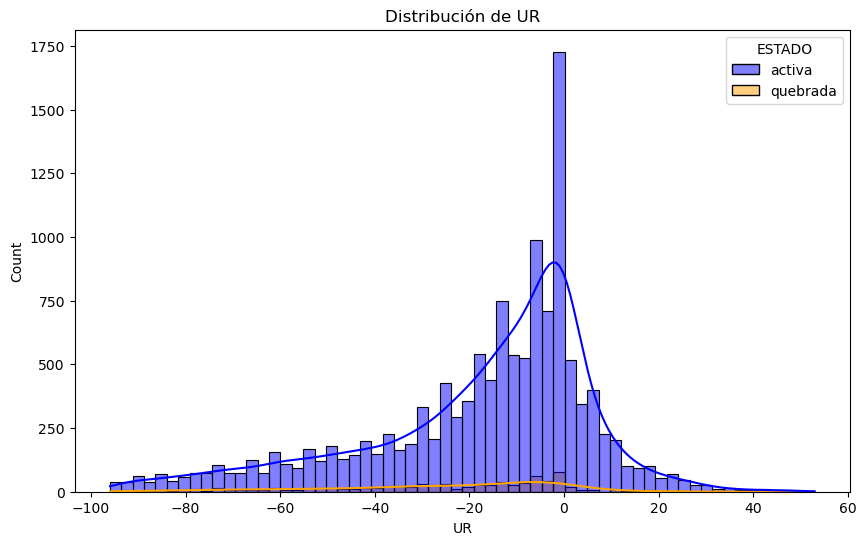

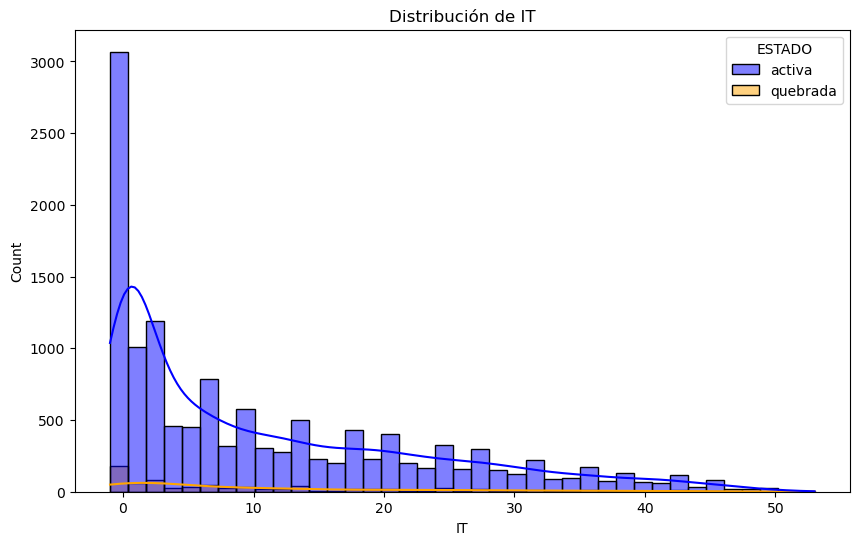

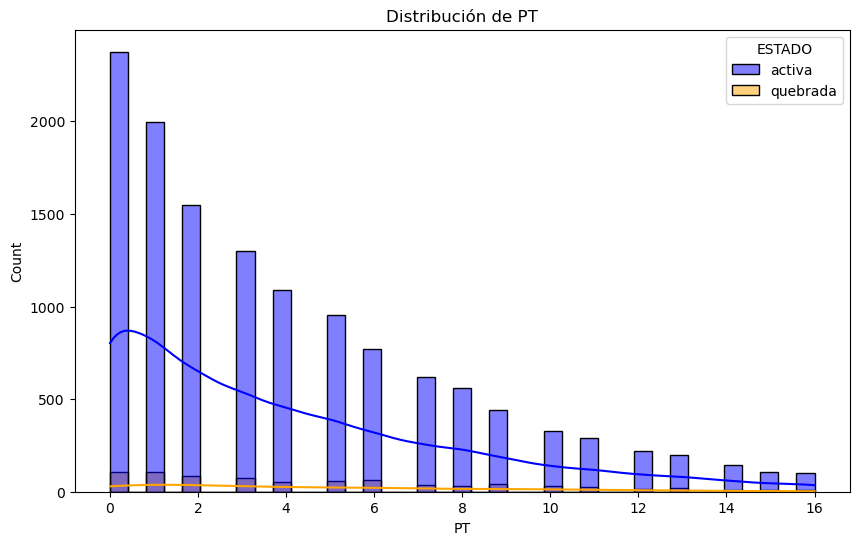

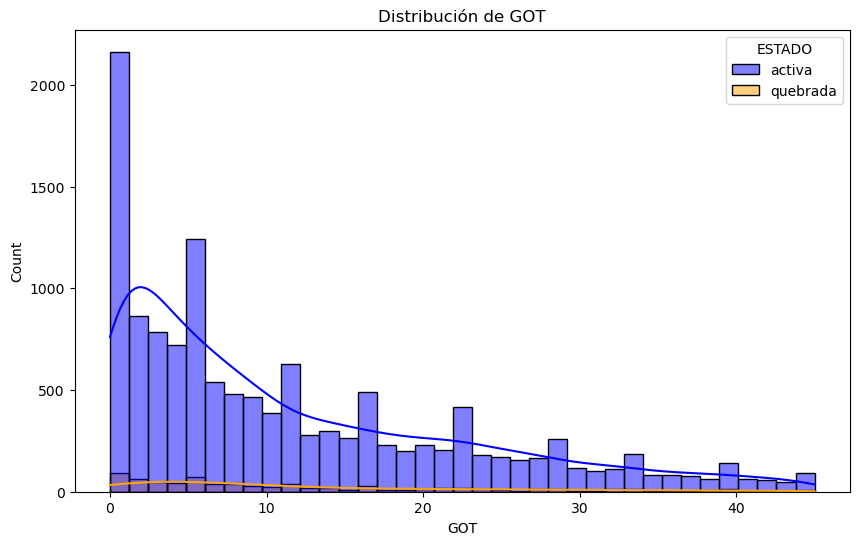

In [11]:
from matplotlib.ticker import FuncFormatter 

# Asignar colores a los estados
colors = {'activa': 'blue', 'quebrada': 'orange'}

# Gráfico de barras para la distribución del estado de las empresas
plt.figure(figsize=(8, 5))
sns.countplot(x='ESTADO', data=data, palette=colors)
plt.title('Distribución del Estado de las Empresas')
plt.show()

# Histogramas para las variables numéricas
for var in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=var, kde=True, hue='ESTADO', palette=colors)
    plt.title(f'Distribución de {var}')
    
    # Formatear el eje X para la variable 'Año'
    if var == 'AÑO':
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
    plt.show()


In [30]:
#análisis de varianza (ANOVA) para cada variable numérica en relación con la variable categórica "ESTADO"
from scipy.stats import f_oneway

# Supongamos que 'data' es tu DataFrame con las variables 'ESTADO' y todas las variables numéricas
# Asegúrate de importar las librerías necesarias y de tener tu DataFrame cargado con los datos

# Lista para almacenar los resultados de ANOVA
resultados_anova = []

# Iterar sobre todas las variables numéricas
for variable_numerica in data.select_dtypes(include='int32').columns:
    # Realizar ANOVA
    grupo_estado = [data[variable_numerica][data['ESTADO'] == estado] for estado in data['ESTADO'].unique()]
    resultado_anova = f_oneway(*grupo_estado)
    
    # Almacenar resultados en la lista
    resultados_anova.append({
        'Variable Numerica': variable_numerica,
        'Estadística F': resultado_anova.statistic,
        'Valor p': resultado_anova.pvalue
    })

# Crear DataFrame con los resultados
df_resultados_anova = pd.DataFrame(resultados_anova)

# Imprimir los resultados
print(df_resultados_anova)

# Ordenar el DataFrame por valor p de menor a mayor
df_resultados_anova = df_resultados_anova.sort_values(by='Valor p')

# Imprimir las 5 variables con más importancia
print("\nTop 5 variables con más importancia:\n")
print(df_resultados_anova.head(5))

   Variable Numerica  Estadística F       Valor p
0                AÑO      73.772346  9.695507e-18
1                 AC       6.560729  1.043588e-02
2                CBV       1.826538  1.765591e-01
3                 DA       1.833611  1.757237e-01
4             EBITDA      95.347899  1.887409e-22
5                  I       6.266005  1.231908e-02
6                 IN      58.177947  2.550490e-14
7                 CC       9.235454  2.378170e-03
8                 VM       8.905969  2.847368e-03
9                 VN       1.147749  2.840395e-01
10                AT       1.217468  2.698774e-01
11                DT       9.837909  1.713103e-03
12              EBIT     106.043058  8.866539e-25
13                UB      18.769040  1.485839e-05
14                PC      28.077936  1.183160e-07
15                UR      84.969597  3.461134e-20
16                IT       1.147749  2.840395e-01
17                PT      27.952720  1.262083e-07
18               GOT       2.430456  1.190211e-01


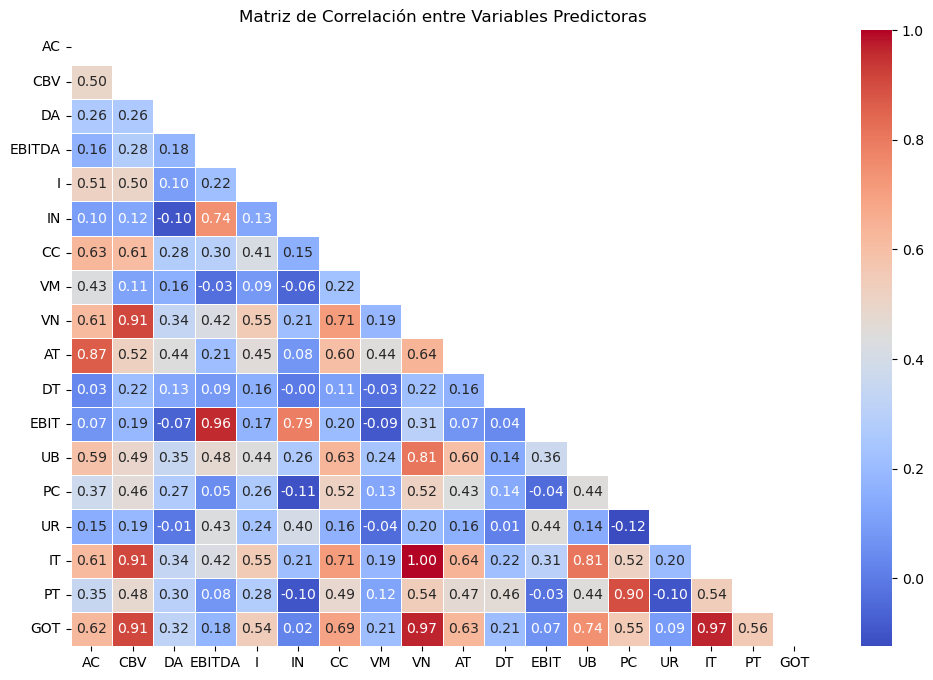

C:\Users\DIEVALL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


   Variable         VIF
0        AC    9.060068
1       CBV  425.839165
2        DA    3.941690
3    EBITDA   57.783180
4         I    2.064476
5        IN    3.284824
6        CC    3.435235
7        VM    2.008150
8        VN         inf
9        AT   11.078770
10       DT    3.132846
11     EBIT   53.640433
12       UB  183.785722
13       PC   20.225867
14       UR    1.938170
15       IT         inf
16       PT   28.200606
17      GOT  981.746823


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Seleccionar solo las variables predictoras numéricas
X = data[numeric_columns]

# Calcular la matriz de correlación
matriz_correlacion = X.corr()

# Crear una máscara para la mitad inferior de la matriz de correlación
mascara = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# Visualizar la mitad inferior de la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mascara)
plt.title('Matriz de Correlación entre Variables Predictoras')
plt.show()

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)


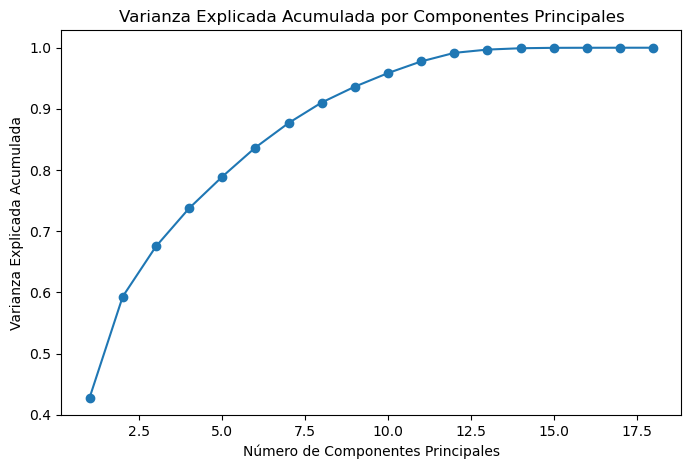

Número de componentes principales a retener: 7
         AC       CBV        DA    EBITDA         I        IN        CC  \
0  0.267319  0.300374  0.147597  0.160598  0.219026  0.083856  0.285791   
1  0.075609  0.023716  0.118428 -0.468495 -0.028218 -0.482524  0.023829   
2  0.396392 -0.110199  0.031882 -0.087969  0.072033 -0.005005  0.064277   
3  0.029190 -0.331326  0.436027  0.257926 -0.354911  0.134098  0.003782   
4  0.122385 -0.033198  0.022911 -0.074091  0.303045 -0.047380 -0.138893   
5 -0.174601  0.140211  0.768184  0.067220 -0.140380 -0.179738 -0.102721   
6  0.132082 -0.151523  0.191602 -0.033477  0.204849 -0.078661  0.132947   

         VM        VN        AT        DT      EBIT        UB        PC  \
0  0.101100  0.344494  0.280136  0.092302  0.113196  0.297335  0.223211   
1  0.132387 -0.016067  0.097206  0.055763 -0.514069 -0.064287  0.230361   
2  0.506878 -0.054961  0.300761 -0.446423 -0.100710  0.044923 -0.279800   
3  0.336350 -0.170633  0.196317  0.165034  0.158019 

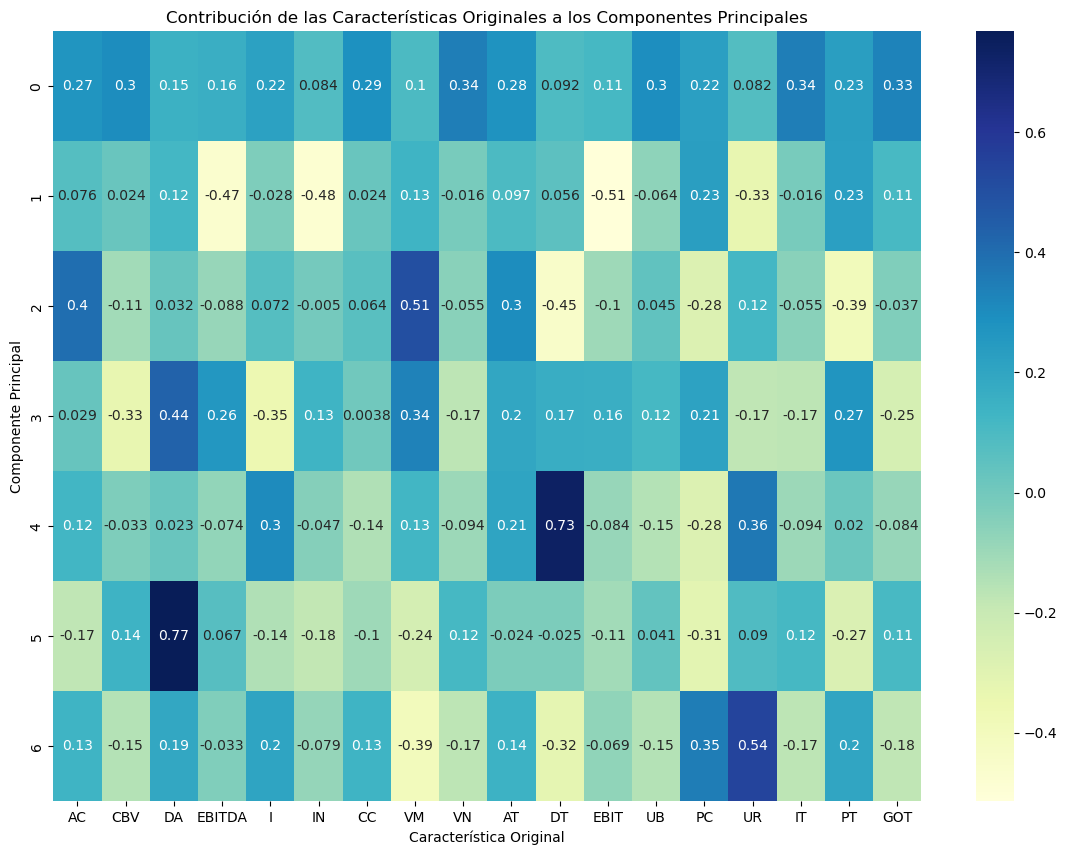


Componente Principal 1:
['IT', 'VN', 'GOT', 'CBV', 'UB']

Componente Principal 2:
['EBIT', 'IN', 'EBITDA', 'UR', 'PC']

Componente Principal 3:
['VM', 'DT', 'AC', 'PT', 'AT']

Componente Principal 4:
['DA', 'I', 'VM', 'CBV', 'PT']

Componente Principal 5:
['DT', 'UR', 'I', 'PC', 'AT']

Componente Principal 6:
['DA', 'PC', 'PT', 'VM', 'IN']

Componente Principal 7:
['UR', 'VM', 'PC', 'DT', 'I']


In [68]:
#Reducción de la Dimensionalidad (8 COMPONENTES)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'data' es tu DataFrame y 'numeric_columns' es la lista de columnas numéricas
# Seleccionando solo las variables numéricas
data_numeric = data[numeric_columns]

# Estandarizando las variables numéricas
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Aplicando PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Calculando la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Visualizando la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

# Decidiendo el número de componentes a retener
num_componentes = np.where(varianza_explicada_acumulada >= 0.85)[0][0] + 1
print(f"Número de componentes principales a retener: {num_componentes}")

# Aplicando PCA con el número seleccionado de componentes
pca_reducido = PCA(n_components=num_componentes)
data_pca = pca_reducido.fit_transform(data_scaled)

# Convertir los vectores propios en un DataFrame
componentes_df = pd.DataFrame(pca_reducido.components_, columns=numeric_columns)
print(componentes_df)

# Visualización de los componentes principales
plt.figure(figsize=(14, 10))
sns.heatmap(componentes_df, cmap='YlGnBu', annot=True)
plt.title('Contribución de las Características Originales a los Componentes Principales')
plt.ylabel('Componente Principal')
plt.xlabel('Característica Original')
plt.show()

# Identificar las variables más relevantes para cada componente principal
n_variables_importantes = 5  # Número de variables más importantes a mostrar por cada componente principal
for i in range(len(componentes_df)):
    print(f"\nComponente Principal {i + 1}:")
    component = componentes_df.iloc[i]
    variables_importantes = component.abs().sort_values(ascending=False).head(n_variables_importantes).index
    print(variables_importantes.tolist())

Epoch 1/5
277/277 [==============================] - 4s 6ms/step - loss: 0.3153 - accuracy: 0.9436 - val_loss: 0.2257 - val_accuracy: 0.9413
Epoch 2/5
277/277 [==============================] - 1s 5ms/step - loss: 0.2283 - accuracy: 0.9436 - val_loss: 0.2217 - val_accuracy: 0.9413
Epoch 3/5
277/277 [==============================] - 1s 5ms/step - loss: 0.2205 - accuracy: 0.9436 - val_loss: 0.2223 - val_accuracy: 0.9413
Epoch 4/5
277/277 [==============================] - 1s 5ms/step - loss: 0.2177 - accuracy: 0.9436 - val_loss: 0.2221 - val_accuracy: 0.9413
Epoch 5/5
87/87 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9487
Precisión del modelo: 0.9486623406410217

Los pesos de la primera capa son:



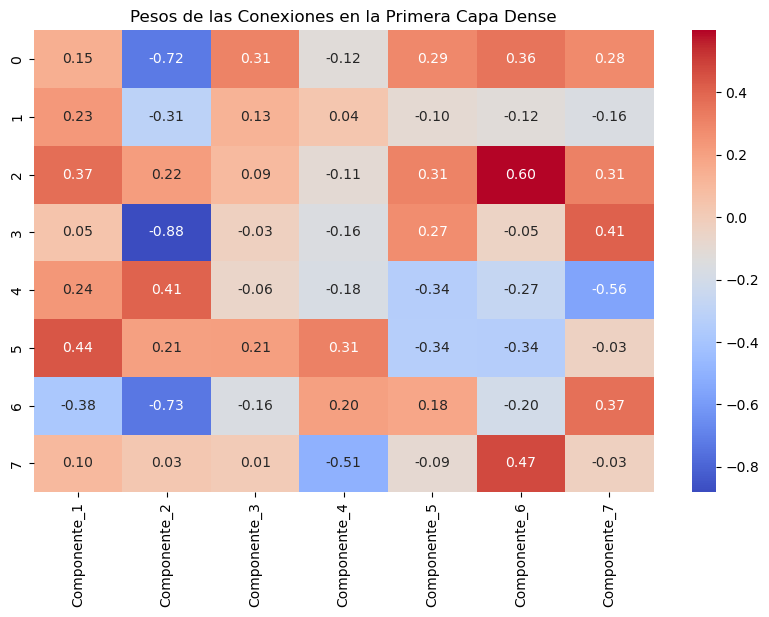


Importancia de los Componentes:

     Componente  Importancia
1  Componente_2     3.500459
5  Componente_6     2.407941
6  Componente_7     2.161652
0  Componente_1     1.957267
4  Componente_5     1.916345
3  Componente_4     1.615953
2  Componente_3     0.997352
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 8)                 64        
                                                                 
 dropout_15 (Dropout)        (None, 8)                 0         
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dropout_16 (Dropout)        (None, 4)                 0         
                                                                 
 dense_22 (Dense)            (None, 2)              

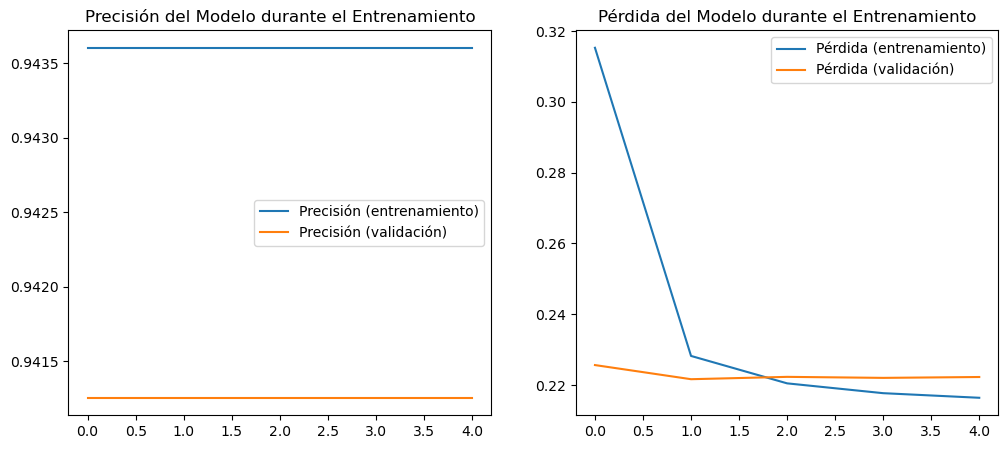

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Modelado con Redes Neuronales
X = data_pca[:, :num_componentes]  # Usar los componentes principales como características
y = data['ESTADO'].cat.codes  # Convertir 'ESTADO' en una variable binaria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo secuencial
model = Sequential()

# Agregar capa de entrada con el número de componentes principales encontrados (8)
model.add(Dense(8, input_dim=num_componentes, activation='relu'))
model.add(Dropout(0.5)) 

# Agregar capa oculta con 4 neuronas
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5)) 

# Agregar otra capa oculta con 2 neuronas
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5)) 

# Agregar capa de salida con 1 neurona y función de activación 'sigmoid'
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión del modelo: {accuracy}')

# Obtener los pesos de la primera capa Dense
pesos_capa_dense = model.layers[0].get_weights()[0]
print("\nLos pesos de la primera capa son:\n")
pesos_capa_dense

# Calcular la importancia de cada componente
importancias = np.abs(pesos_capa_dense).sum(axis=1)

# Crear un DataFrame para visualizar las importancias junto con los nombres de las variables
df_importancias = pd.DataFrame({'Componente': [f'Componente_{i}' for i in range(1, num_componentes + 1)],
                                'Importancia': importancias})

# Ordenar el DataFrame por importancia de mayor a menor
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Visualizar los pesos
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(pesos_capa_dense.T, columns=[f'Componente_{i}' for i in range(1, num_componentes + 1)]), 
            cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pesos de las Conexiones en la Primera Capa Dense')
plt.show()

# Visualizar métricas de entrenamiento
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (validación)')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (validación)')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.legend()

# Imprimir el DataFrame ordenado de importancias
print("\nImportancia de los Componentes:\n")
print(df_importancias)

# Obtener un resumen del modelo
model.summary()


In [70]:
# Imprimir tabla con precisión y pérdida
df_metricas = pd.DataFrame({
    'Epoch': range(1, len(history.history['accuracy']) + 1),
    'Precisión (entrenamiento)': history.history['accuracy'],
    'Precisión (validación)': history.history['val_accuracy'],
    'Pérdida (entrenamiento)': history.history['loss'],
    'Pérdida (validación)': history.history['val_loss']
})

print("\nTabla de Métricas:")
df_metricas


Tabla de Métricas:


,Epoch,Precisión (entrenamiento),Precisión (validación),Pérdida (entrenamiento),Pérdida (validación)
0,1,0.942699,0.941256,0.380930,0.254913
1,2,0.943603,0.941256,0.230100,0.226122
2,3,0.943603,0.941256,0.218293,0.223627
3,4,0.943603,0.941256,0.217111,0.223497
4,5,0.943603,0.941256,0.217043,0.223526
